# Compare models for visual proprioception

Compares regression models for visual proprioception, by running them on specific test data, and creating comparison graphs that put all of them onto the graphs. 

Each configuration is specified by a run of type visual_proprioception.

In [ ]:
import sys
sys.path.append("..")
from settings import Config

import pathlib
from pprint import pprint
import matplotlib.pyplot as plt
# fixing the fact that it defaults to Type 3 fonts
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import numpy as np
import math
import torch
import torch.nn as nn
#import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

torch.manual_seed(1)

from sensorprocessing import sp_conv_vae, sp_propriotuned_cnn, sp_vit
# from robot.al5d_position_controller import RobotPosition

from visual_proprioception.visproprio_helper import load_demonstrations_as_proprioception_training, get_visual_proprioception_sp, load_multiview_demonstrations_as_proprioception_training ,load_concat_demonstrations_as_proprioception_training
from visual_proprioception.visproprio_models import VisProprio_SimpleMLPRegression
from visproprio_helper import get_visual_proprioception_sp


Loading pointer config file: /home/ssheikholeslami/.config/BerryPicker/mainsettings.yaml
Loading machine-specific config file: /home/ssheikholeslami/SaharaBerryPickerData/settings-sahara.yaml
Using device: cuda


In [ ]:
experiment = "visual_proprioception"

# the lead run is the one that will provide the test data.
# also the directory of this run is where the graphs will be saved.

# all of them
# leadrun = "comp_all"
# leadrun = "comp_vae"
# leadrun = "comp_resnet"
# leadrun = "comp_vgg"
# leadrun = "comp_all_with_vit"
# leadrun = "comp_vit"
# leadrun = "comp_aruco"
leadrun = "comp_vit_multiview_base"
# leadrun = "comp_vit_multiview_large"
# leadrun = "comp_vit_multiview_all"


# now load them

leadexp = Config().get_experiment(experiment, leadrun)

runs = leadexp["tocompare"]

# runs = ["vp_convvae_128", "vp_convvae_256", "vp_ptun_vgg19_128", "vp_ptun_vgg19_256", "vp_ptun_resnet50_128", "vp_ptun_resnet50_256", "vp_aruco_128"]



exps = []
sps = [ ]
models = [ ]
for run in runs:
    exp = Config().get_experiment(experiment, run)
    exps.append(exp)
    sp = get_visual_proprioception_sp(exp)
    sps.append(sp)
    model = VisProprio_SimpleMLPRegression(exp)
    modelfile = pathlib.Path(exp["data_dir"],
                            exp["proprioception_mlp_model_file"])
    model.load_state_dict(torch.load(modelfile))
    models.append(model)


No system dependent experiment file
 /home/ssheikholeslami/SaharaBerryPickerData/experiments-Config/visual_proprioception/comp_vit_multiview_base_sysdep.yaml,
 that is ok, proceeding.
Configuration for experiment: visual_proprioception/comp_vit_multiview_base successfully loaded
No system dependent experiment file
 /home/ssheikholeslami/SaharaBerryPickerData/experiments-Config/visual_proprioception/vit_base_concat_multiview_sysdep.yaml,
 that is ok, proceeding.
Configuration for experiment: visual_proprioception/vit_base_concat_multiview successfully loaded


No system dependent experiment file
 /home/ssheikholeslami/SaharaBerryPickerData/experiments-Config/sensorprocessing_propriotuned_Vit_concat_multiview/vit_base_concat_multiview_sysdep.yaml,
 that is ok, proceeding.
Configuration for experiment: sensorprocessing_propriotuned_Vit_concat_multiview/vit_base_concat_multiview successfully loaded
Initializing Concatenated Image ViT Sensor Processing:
  Model: vit_b_16
  Number of views: 2
  Latent dimension: 128
  Image size: 224x224
Using vit_b_16 with output dimension 768
Created projection network: 768 → 512 → 256 → 128
Created proprioceptor: 128 → 64 → 64 → 6
Feature extractor frozen. Projection and proprioceptor layers are trainable.
Loading Concatenated Image ViT encoder weights from /home/ssheikholeslami/SaharaBerryPickerData/experiment_data/sensorprocessing_propriotuned_Vit_concat_multiview/vit_base_concat_multiview/proprioception_mlp.pth


/lustre/fs1/home/ssheikholeslami/BerryPicker/src/visual_proprioception/../sensorprocessing/sp_vit_concat_images.py:230: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.en

No system dependent experiment file
 /home/ssheikholeslami/SaharaBerryPickerData/experiments-Config/visual_proprioception/vit_base_multiview_sysdep.yaml,
 that is ok, proceeding.
Configuration for experiment: visual_proprioception/vit_base_multiview successfully loaded
No system dependent experiment file
 /home/ssheikholeslami/SaharaBerryPickerData/experiments-Config/sensorprocessing_propriotuned_Vit_multiview/vit_base_multiview_sysdep.yaml,
 that is ok, proceeding.
Configuration for experiment: sensorprocessing_propriotuned_Vit_multiview/vit_base_multiview successfully loaded


/tmp/ipykernel_131179/3001681954.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(modelfile))


Initializing Multi-View ViT Sensor Processing:
  Model: vit_b_16
  Number of views: 2
  Fusion type: concat_proj
  Latent dimension: 128
  Image size: 224x224
Using 2 x vit_b_16 with output dimension 768
Created fusion network (concat_proj): 1536 → 512 → 256 → 128
Created proprioceptor: 128 → 64 → 64 → 6
Feature extractors frozen. Projection and proprioceptor layers are trainable.
Loading Multi-View ViT encoder weights from /home/ssheikholeslami/SaharaBerryPickerData/experiment_data/sensorprocessing_propriotuned_Vit_multiview/vit_base_multiview/proprioception_mlp.pth


/lustre/fs1/home/ssheikholeslami/BerryPicker/src/visual_proprioception/../sensorprocessing/sp_vit_multiview.py:357: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.enc.lo

No system dependent experiment file
 /home/ssheikholeslami/SaharaBerryPickerData/experiments-Config/visual_proprioception/vit_base_multiview_indiv_proj_sysdep.yaml,
 that is ok, proceeding.
Configuration for experiment: visual_proprioception/vit_base_multiview_indiv_proj successfully loaded
No system dependent experiment file
 /home/ssheikholeslami/SaharaBerryPickerData/experiments-Config/sensorprocessing_propriotuned_Vit_multiview/vit_base_multiview_indiv_proj_sysdep.yaml,
 that is ok, proceeding.
Configuration for experiment: sensorprocessing_propriotuned_Vit_multiview/vit_base_multiview_indiv_proj successfully loaded
Initializing Multi-View ViT Sensor Processing:
  Model: vit_b_16
  Number of views: 2
  Fusion type: indiv_proj
  Latent dimension: 128
  Image size: 224x224
Using 2 x vit_b_16 with output dimension 768
Created individual projections: 768 → 512 → 128
Created fusion layer: 256 → 128
Created proprioceptor: 128 → 64 → 64 → 6
Feature extractors frozen. Projection and propri

In [3]:
# Load test data for the lead experiment
task = leadexp["proprioception_testing_task"]
proprioception_input_file = pathlib.Path(
    leadexp["data_dir"], leadexp["proprioception_test_input_file"])
proprioception_target_file = pathlib.Path(
    leadexp["data_dir"], leadexp["proprioception_test_target_file"])

# Check if lead experiment is multi-view and what approach it uses
is_lead_multiview = (
    leadexp.get("sensor_processing", "") == "Vit_multiview"  or
    leadexp.get("sensor_processing", "").endswith("_multiview") or
    leadexp.get("num_views", 1) > 1
)
is_concat_model = leadexp.get("sensor_processing", "") == "Vit_concat_images"

if is_lead_multiview:
    if is_concat_model:
        print("Using concat image model data loading")
        # Use the specialized concat loading function
        tr = load_concat_demonstrations_as_proprioception_training(
            task,
            proprioception_input_file,
            proprioception_target_file,
            num_views=leadexp.get("num_views", 2)
        )
    else:
        print("Using standard multi-view data loading")
        # Use standard multi-view loading function
        tr = load_multiview_demonstrations_as_proprioception_training(
            task,
            proprioception_input_file,
            proprioception_target_file,
            num_views=leadexp.get("num_views", 2)
        )
else:
    print("Using single-view data loading")
    # Use original single-view loading function
    tr = load_demonstrations_as_proprioception_training(
        sp, task, proprioception_input_file, proprioception_target_file)

# The targets should be the same regardless of approach
targets = tr["targets"]
print(f"There are {targets.shape[0]} data points")

Using single-view data loading
There are 957 data points


In [ ]:
# Evaluation Script
no_from = 0
no_to = targets.shape[0]

ypreds = []

for exp, sp, model in zip(exps, sps, models):
    # Make sure model is on the right device
    model = model.to(Config().runtime["device"])

    task = exp["proprioception_testing_task"]
    proprioception_input_file = pathlib.Path(
        exp["data_dir"], exp["proprioception_test_input_file"])
    proprioception_target_file = pathlib.Path(
        exp["data_dir"], exp["proprioception_test_target_file"])

    # Check which type of model we're dealing with
    is_multiview = (
        leadexp.get("sensor_processing", "") == "Vit_multiview" or
        exp.get("sensor_processing", "").endswith("_multiview") or
        exp.get("num_views", 1) > 1
    )
    is_concat_model = exp.get("sensor_processing", "") == "Vit_concat_images"

    if is_multiview:
        if is_concat_model:
            print(f"Evaluating concat model for experiment {exp.get('name', 'unknown')}")
            # Use the concat-specific loading function
            tr = load_concat_demonstrations_as_proprioception_training(
                task,
                proprioception_input_file,
                proprioception_target_file,
                num_views=exp.get("num_views", 2)
            )

            # Process each data point - raw_views is what we need here
            ypred = []
            y = []
            t = []

            with torch.no_grad():
                for i in range(no_from, no_to):
                    # For concat model, we first need to get the latent features
                    views = [view[i].unsqueeze(0).to(Config().runtime["device"]) for view in tr["raw_views"]]

                    # Extract features from the concat model encoder (don't use the whole model)
                    latent = sp.enc.encode(views)

                    # Pass the latent features to the MLP model (not the raw views)
                    predictions = model(latent)

                    # Move predictions back to CPU for numpy conversion
                    predictions_cpu = predictions.cpu()

                    # Append the data
                    t.append(i)
                    y.append(targets[i].numpy())
                    ypred.append(predictions_cpu[0].numpy())
        else:
            print(f"Evaluating standard multi-view model for experiment {exp.get('name', 'unknown')}")
            # Use the standard multi-view loading function
            tr = load_multiview_demonstrations_as_proprioception_training(
                task,
                proprioception_input_file,
                proprioception_target_file,
                num_views=exp.get("num_views", 2)
            )

            # Process each data point with view_inputs
            ypred = []
            y = []
            t = []

            with torch.no_grad():
                for i in range(no_from, no_to):
                    # Get the latent representation from sp (handles multi-view encoding)
                    views = [view[i].unsqueeze(0).to(Config().runtime["device"]) for view in tr["view_inputs"]]
                    latent = sp.process(views)

                    # Make sure the latent tensor is on the same device as the model
                    latent_tensor = torch.from_numpy(latent).float().unsqueeze(0).to(Config().runtime["device"])

                    # Pass latent to regression model
                    predictions = model(latent_tensor)

                    # Move predictions back to CPU for numpy conversion
                    predictions_cpu = predictions.cpu()

                    # Append the data
                    t.append(i)
                    y.append(targets[i].numpy())
                    ypred.append(predictions_cpu[0].numpy())
    else:
        print(f"Evaluating single-view model for experiment {exp.get('name', 'unknown')}")
        # Original single-view approach
        tr = load_demonstrations_as_proprioception_training(
            sp, task, proprioception_input_file, proprioception_target_file)
        inputs = tr["inputs"]

        ypred = []
        y = []
        t = []
        with torch.no_grad():
            for i in range(no_from, no_to):
                # Move input to the correct device
                x = inputs[i].to(Config().runtime["device"])
                predictions = model(torch.unsqueeze(x, dim=0))

                # Move predictions back to CPU for numpy conversion
                predictions_cpu = predictions.cpu()

                # Append the data
                t.append(i)
                y.append(targets[i].numpy())
                ypred.append(predictions_cpu[0].numpy())

    ypred = np.array(ypred)
    ypreds.append(ypred)
    y = np.array(y)
    t = np.array(t)

    # Print evaluation metrics
    mse = np.mean(np.sum((ypred - y) ** 2, axis=1))
    print(f"Model {exp.get('name', 'unknown')} MSE: {mse:.6f}")

Evaluating concat model for experiment vit-base-128-concat-multiview
Loading cached concat data from /home/ssheikholeslami/SaharaBerryPickerData/experiment_data/visual_proprioception/vit_base_concat_multiview/test_inputs.pt


Created 641 concat training examples and 316 validation examples
Model vit-base-128-concat-multiview MSE: 0.315375
Evaluating standard multi-view model for experiment vit-base-128-multiview-concat-proj
Loading cached data from /home/ssheikholeslami/SaharaBerryPickerData/experiment_data/visual_proprioception/vit_base_multiview/test_inputs.pt
Created 641 training examples and 316 validation examples
Model vit-base-128-multiview-concat-proj MSE: 0.330771
Evaluating standard multi-view model for experiment vit-base-128-multiview-indiv-proj
Loading cached data from /home/ssheikholeslami/SaharaBerryPickerData/experiment_data/visual_proprioception/vit_base_multiview_indiv_proj/test_inputs.pt
Created 641 training examples and 316 validation examples
Model vit-base-128-multiview-indiv-proj MSE: 0.322482
Evaluating standard multi-view model for experiment vit-base-128-multiview-attention
Loading cached data from /home/ssheikholeslami/SaharaBerryPickerData/experiment_data/visual_proprioception/vi

Iterate throuh all the components. The thing with it though is that this will get the test data from the components, not from the lead exp.

FIXME: maybe I could just write a function that runs a particular proprioceptor on a whole task and returns the y, and then just call that. 

## Time compare plot - double column
At this point, we should have the ypreds, the y and the t and we can plot them.

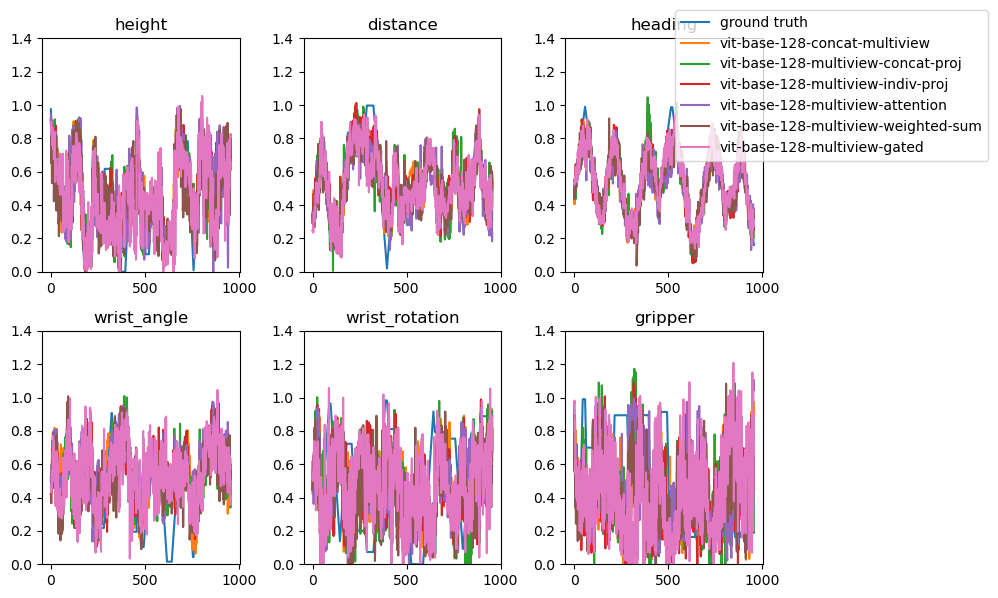

In [5]:
fig, axs = plt.subplots(2,3, figsize=(8, 6))
titles = ["height","distance", "heading", "wrist_angle", "wrist_rotation", "gripper"]
for i in range(Config()["robot"]["action_space_size"]):
    ax = axs[i//3, i%3]
    ax.set_ylim(0, 1.4)
    ax.plot(t, y[:,i], label="ground truth")
    for ypred, exp in zip(ypreds,exps):
        # fixme, fix the label to the name in the exp
        ax.plot(t, ypred[:,i], label=exp["name"])
    if i==0:
        fig.legend(bbox_to_anchor=(1.25, 1))
    ax.set_title(titles[i])

plt.tight_layout()
graphfilename = pathlib.Path(leadexp["data_dir"], "comparison.pdf")
plt.savefig(graphfilename, bbox_inches='tight')

## Time compare plot, single column

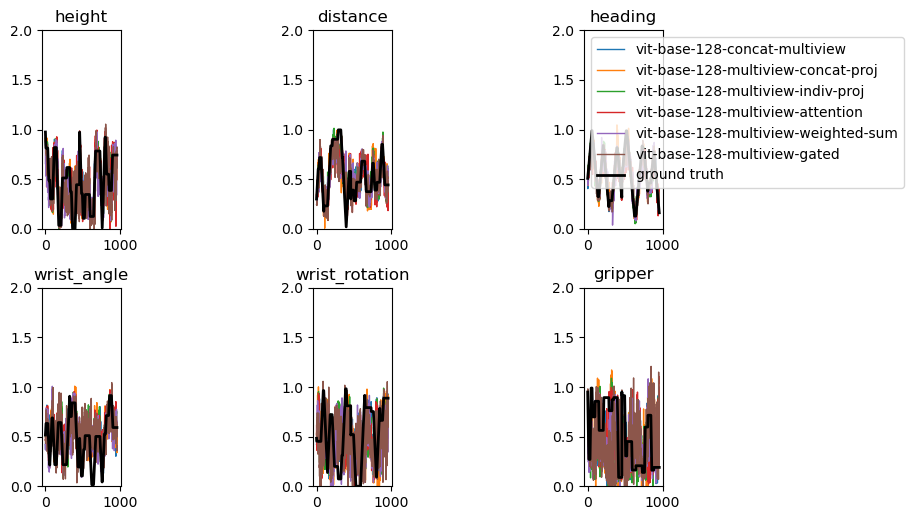

In [6]:
fig, axs = plt.subplots(2,3, figsize=(7, 5.3))
titles = ["height","distance", "heading", "wrist_angle", "wrist_rotation", "gripper"]
for i in range(Config()["robot"]["action_space_size"]):
    ax = axs[i//3, i%3]
    ax.set_ylim(0, 2.0)
    for ypred, exp in zip(ypreds,exps):
        # fixme, fix the label to the name in the exp
        ax.plot(t, ypred[:,i], label=exp["name"], linewidth=1)
    ax.plot(t, y[:,i], label="ground truth", linewidth=2, color="black")
    if i==2:
        ax.legend()
    ax.set_title(titles[i])

plt.tight_layout()
graphfilename = pathlib.Path(leadexp["data_dir"], "comparison.pdf")
plt.savefig(graphfilename, bbox_inches='tight')

## Time compare plot, vertical with legend bottom

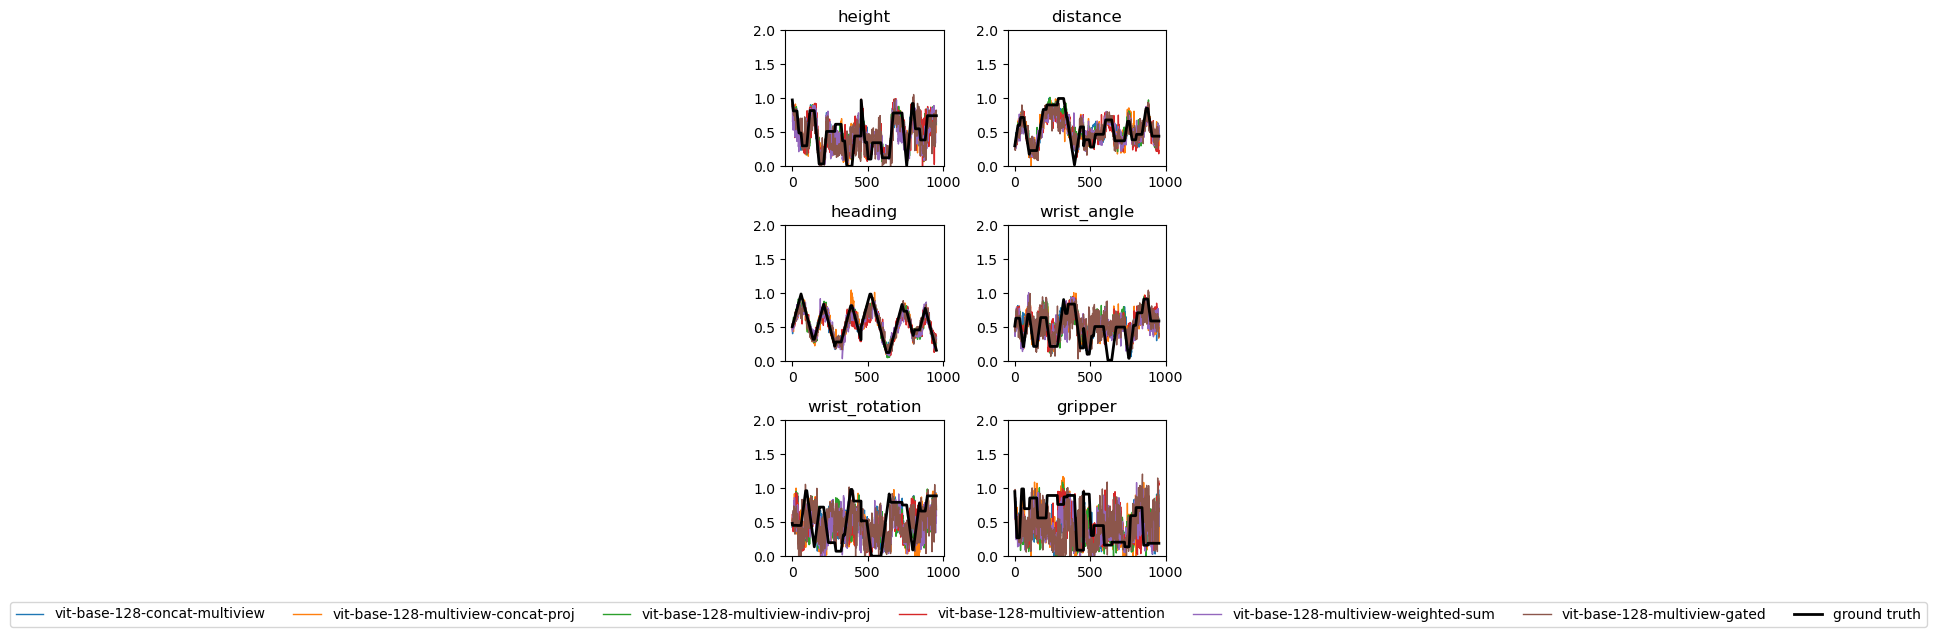

In [7]:
#fig, axs = plt.subplots(3,2, figsize=(5.3, 7))
fig, axs = plt.subplots(3,2, figsize=(4.6, 6))
titles = ["height","distance", "heading", "wrist_angle", "wrist_rotation", "gripper"]
for i in range(Config()["robot"]["action_space_size"]):
    ax = axs[i//2, i%2]
    ax.set_ylim(0, 2.0)
    for ypred, exp in zip(ypreds,exps):
        # fixme, fix the label to the name in the exp
        ax.plot(t, ypred[:,i], label=exp["name"], linewidth=1)
    ax.plot(t, y[:,i], label="ground truth", linewidth=2, color="black")
    if i==4:
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, ncol=len(exps)+1,
            bbox_to_anchor=(0.5, 0), loc="upper center")
    ax.set_title(titles[i])

plt.tight_layout()
graphfilename = pathlib.Path(leadexp["data_dir"], "comparison23.pdf")
plt.savefig(graphfilename, bbox_inches='tight')
graphfilename = pathlib.Path(leadexp["data_dir"], "comparison23.jpg")
plt.savefig(graphfilename, bbox_inches='tight')

### Comparing the average accuracy
Create a graph that is comparing the average accuracy. 

/tmp/ipykernel_131179/2912847698.py:21: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/tmp/ipykernel_131179/2912847698.py:24: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


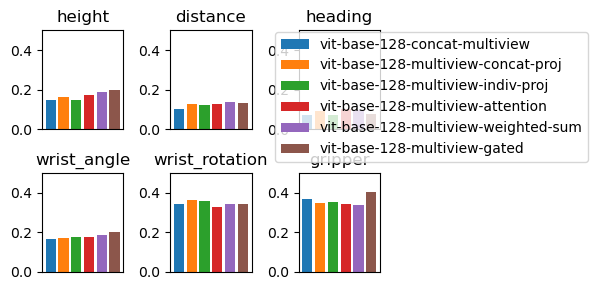

In [8]:
fig, axs = plt.subplots(2,3, figsize=(4, 3))

for i in range(Config()["robot"]["action_space_size"]):
    ax = axs[i//3, i%3]
    # ax.set_ylim(0, 0.4)
    ax.set_ylim(0, 0.5)
    # ax.plot(t, y[:,i], label="y")
    bars = []
    names = []
    for ypred, exp in zip(ypreds,exps):
        ## FIXME: some kind of different plot
        # error = avg(y[:,i], ypred[:,i])
        error = math.sqrt(np.mean((y[:,i]- ypred[:,i]) ** 2))
        br = ax.bar(exp["name"], error)
        bars.append(br)
        names.append(exp["name"])
    # Remove x-axis labels if desired
    ax.set_xticks([])
    if i==0:
        fig.legend(bars, names, bbox_to_anchor=(1.50, 0.9), ncol=1)
    fig.tight_layout()
    ax.set_title(titles[i])

fig.tight_layout()
graphfilename = pathlib.Path(leadexp["data_dir"], "msecomparison.pdf")
plt.savefig(graphfilename, bbox_inches='tight')
graphfilename = pathlib.Path(leadexp["data_dir"], "msecomparison.jpg")
plt.savefig(graphfilename, bbox_inches='tight')

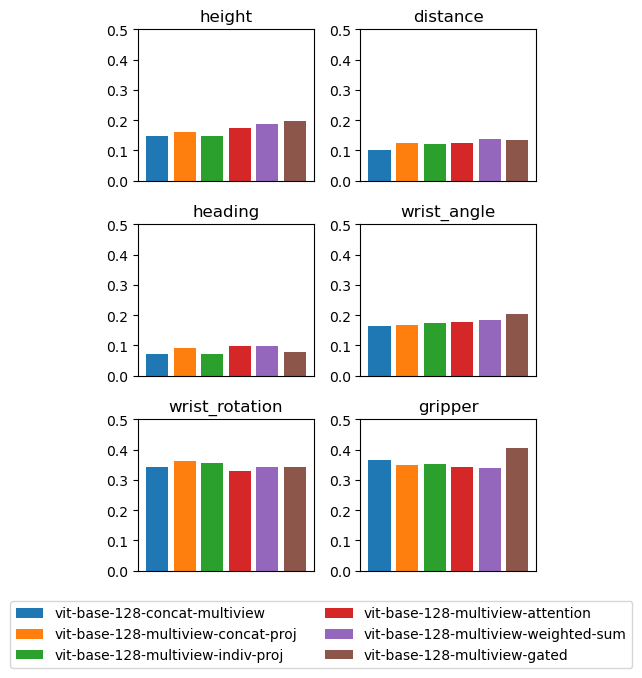

In [9]:
fig, axs = plt.subplots(3,2, figsize=(4.6, 6))

for i in range(Config()["robot"]["action_space_size"]):
    ax = axs[i//2, i%2]
    # ax.set_ylim(0, 0.4)
    ax.set_ylim(0, 0.5)
    # ax.plot(t, y[:,i], label="y")
    bars = []
    names = []
    for ypred, exp in zip(ypreds,exps):
        ## FIXME: some kind of different plot
        # error = avg(y[:,i], ypred[:,i])
        error = math.sqrt(np.mean((y[:,i]- ypred[:,i]) ** 2))
        br = ax.bar(exp["name"], error, label=exp["name"])
        bars.append(br)
        names.append(exp["name"])
    # Remove x-axis labels if desired
    ax.set_xticks([])
    if i==4:
        handles, labels = ax.get_legend_handles_labels()
        #ncolumn = len(exps)
        ncolumn = 2
        fig.legend(handles, labels, ncol=ncolumn,
            bbox_to_anchor=(0.5, 0), loc="upper center")
    # fig.tight_layout()
    ax.set_title(titles[i])

fig.tight_layout()
graphfilename = pathlib.Path(leadexp["data_dir"], "msecomparison23.pdf")
plt.savefig(graphfilename, bbox_inches='tight')
graphfilename = pathlib.Path(leadexp["data_dir"], "msecomparison23.jpg")
plt.savefig(graphfilename, bbox_inches='tight')